In [55]:
import json
import pandas as pd
from datetime import datetime
import glob
import os

# Create a list to store all keyword data
keyword_records = []

# Get all json files in the search_volume folder
json_files = glob.glob('search_volumes/*.json')
print(f"Found {len(json_files)} JSON files to process")

for file_path in json_files:
    # print(f"Processing file: {file_path}")
    # Load each json file
    with open(file_path, 'r') as f:
        keywords_data = json.load(f)

    # Extract keywords and data from each file
    if 'tasks' in keywords_data and len(keywords_data['tasks']) > 0:
        task = keywords_data['tasks'][0]
        results = task.get('result', [])
        
        # Check if this is the suggestions.json format (results contain keyword directly)
        # or the original format (keywords in data.keywords array)
        if results and len(results) > 0 and isinstance(results[0], dict) and 'keyword' in results[0]:
            # Format 2: suggestions.json - keywords are in result objects
            for result in results:
                keyword = result.get('keyword')
                if keyword:
                    keyword_record = {
                        'keyword': keyword,
                        'search_volume': result.get('search_volume', 0),
                        'competition': result.get('competition_index', 'unknown'),
                        'low_top_of_page_bid': result.get('low_top_of_page_bid', 0),
                        'high_top_of_page_bid': result.get('high_top_of_page_bid', 0),
                        'cpc': result.get('cpc', 0)
                    }

                    # Add monthly search volumes as separate columns
                    if result.get('monthly_searches'):
                        for month_data in result['monthly_searches']:
                            year = month_data.get('year')
                            month = month_data.get('month')
                            column_name = f"{year}_{month:02d}"
                            keyword_record[column_name] = month_data.get('search_volume', 0)

                    keyword_records.append(keyword_record)
        elif 'data' in task and 'keywords' in task['data']:
            # Format 1: Original format - keywords in data.keywords array, matched by index
            keywords_list = task['data']['keywords']
            # print(f"  Found {len(keywords_list)} keywords and {len(results)} results")

            for i, keyword in enumerate(keywords_list):
                if i < len(results):
                    result = results[i]
                    keyword_record = {
                        'keyword': keyword,
                        'search_volume': result.get('search_volume', 0),
                        'competition': result.get('competition_index', 'unknown'),
                        'low_top_of_page_bid': result.get('low_top_of_page_bid', 0),
                        'high_top_of_page_bid': result.get('high_top_of_page_bid', 0),
                        'cpc': result.get('cpc', 0)
                    }

                    # Add monthly search volumes as separate columns
                    if result.get('monthly_searches'):
                        for month_data in result['monthly_searches']:
                            year = month_data.get('year')
                            month = month_data.get('month')
                            column_name = f"{year}_{month:02d}"
                            keyword_record[column_name] = month_data.get('search_volume', 0)

                    keyword_records.append(keyword_record)

# Create DataFrame
df = pd.DataFrame(keyword_records)

print(f"DataFrame created with {len(df)} rows and {len(df.columns)} columns")
print(f"Columns: {list(df.columns)}")
print("\nFirst few rows:")
df

Found 196 JSON files to process
DataFrame created with 195600 rows and 53 columns
Columns: ['keyword', 'search_volume', 'competition', 'low_top_of_page_bid', 'high_top_of_page_bid', 'cpc', '2025_09', '2025_08', '2025_07', '2025_06', '2025_05', '2025_04', '2025_03', '2025_02', '2025_01', '2024_12', '2024_11', '2024_10', '2024_09', '2024_08', '2024_07', '2024_06', '2024_05', '2024_04', '2024_03', '2024_02', '2024_01', '2023_12', '2023_11', '2023_10', '2023_09', '2023_08', '2023_07', '2023_06', '2023_05', '2023_04', '2023_03', '2023_02', '2023_01', '2022_12', '2022_11', '2022_10', '2022_09', '2022_08', '2022_07', '2022_06', '2022_05', '2022_04', '2022_03', '2022_02', '2022_01', '2021_12', '2021_11']

First few rows:


,keyword,search_volume,competition,low_top_of_page_bid,high_top_of_page_bid,cpc,2025_09,2025_08,2025_07,2025_06,...,2022_08,2022_07,2022_06,2022_05,2022_04,2022_03,2022_02,2022_01,2021_12,2021_11
0,latinx banking,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,programming assessment,720.0,5.0,1.04,9.70,7.32,720.0,590.0,590.0,590.0,...,1000.0,720.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,880.0,1000.0
2,buy preloved,20.0,58.0,NaN,NaN,0.09,30.0,20.0,30.0,20.0,...,70.0,50.0,70.0,70.0,90.0,70.0,50.0,70.0,40.0,70.0
3,robotaxi analytics,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,pricing for enterprises,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195595,enterprise cloud automation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
195596,ai consulting platform,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
195597,remote rendering,140.0,16.0,0.96,4.63,5.09,90.0,90.0,110.0,110.0,...,320.0,260.0,320.0,320.0,320.0,390.0,320.0,320.0,210.0,390.0
195598,ai threat detection,1000.0,32.0,0.38,17.43,6.81,1600.0,2400.0,1600.0,720.0,...,70.0,50.0,50.0,50.0,90.0,90.0,70.0,90.0,40.0,40.0


In [56]:

# Remove duplicate rows based on the 'keyword' column
df = df.drop_duplicates(subset=['keyword'], keep='first')

print(f"\nAfter removing duplicates:")
print(f"DataFrame now has {len(df)} rows")


After removing duplicates:
DataFrame now has 195600 rows


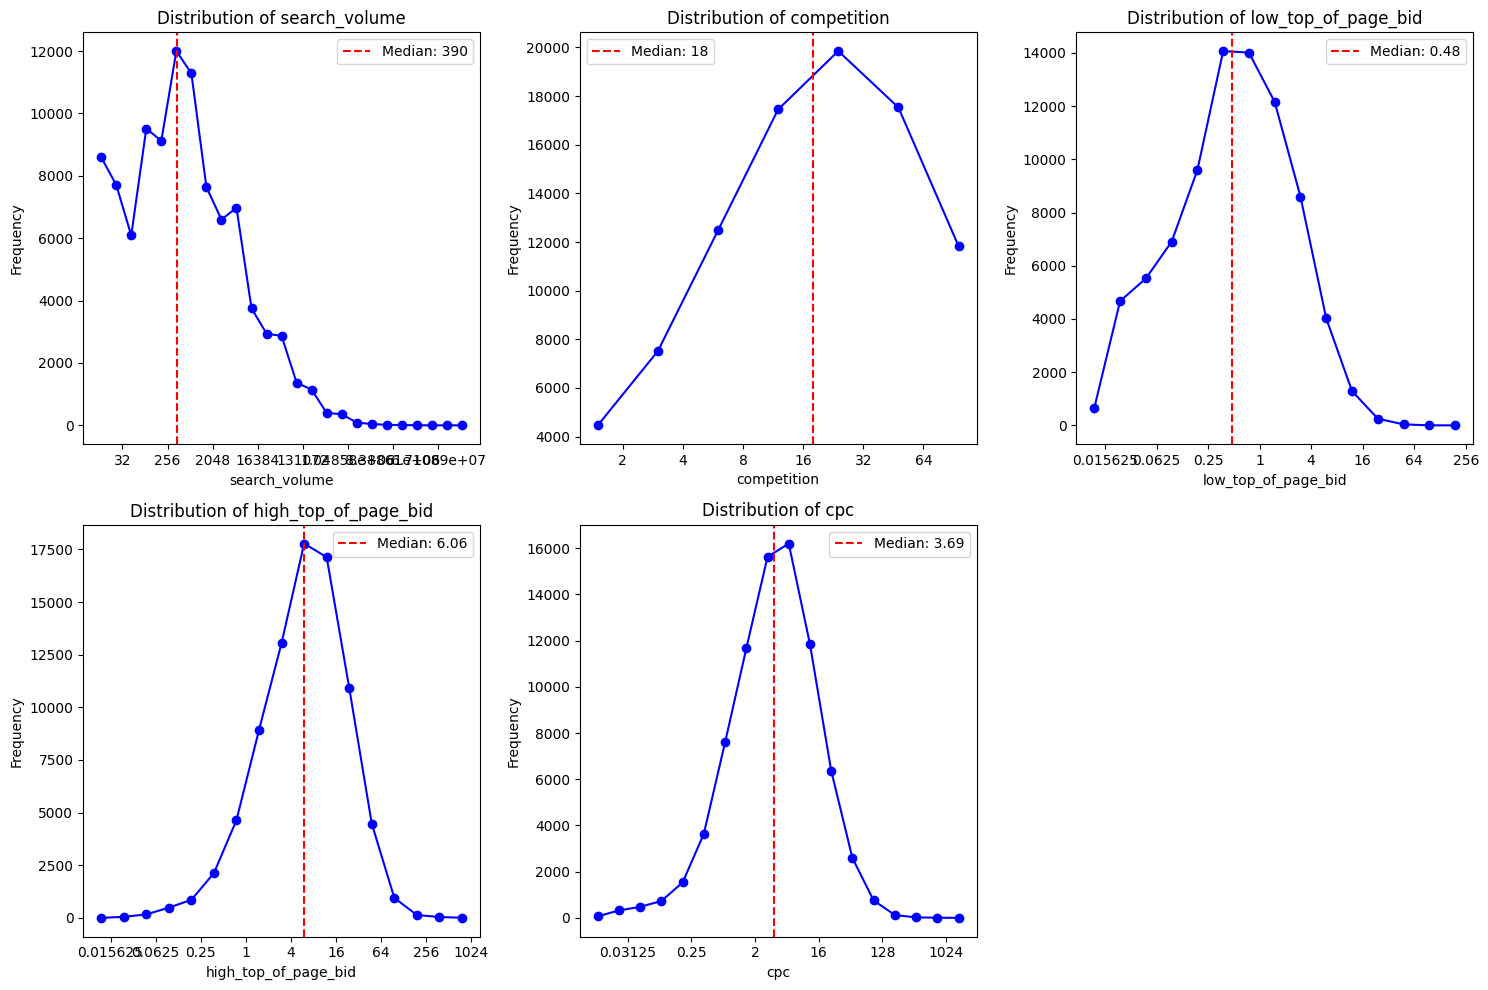

In [57]:
import matplotlib.pyplot as plt
import numpy as np
# Create histograms for numerical columns
base_columns = ['search_volume', 'competition', 'low_top_of_page_bid', 'high_top_of_page_bid', 'cpc']
numerical_columns = [col for col in df.columns if col in base_columns]

# Calculate number of rows and columns for subplot grid
n_cols = 3
n_rows = (len(numerical_columns) + n_cols - 1) // n_cols

plt.figure(figsize=(15, 5*n_rows))

for i, col in enumerate(numerical_columns):
    plt.subplot(n_rows, n_cols, i+1)
    
    # Remove zeros and NaN values for better visualization
    data = df[col][df[col] > 0].dropna()
    
    if len(data) > 0:
        # Calculate log2 bins
        min_val = np.floor(np.log2(data.min()))
        max_val = np.ceil(np.log2(data.max()))
        
        # Create bins as powers of 2
        bins = [2**x for x in range(int(min_val), int(max_val)+1)]
        
        # Create histogram and get bin counts/edges
        counts, edges = np.histogram(data, bins=bins)
        # Get bin centers for point plot
        centers = (edges[:-1] + edges[1:]) / 2
        
        # Plot points
        plt.plot(centers, counts, 'o-', color='blue')
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.xscale('log', base=2)  # Use log base 2
        
        # Format x-axis with actual numbers and ensure values below 1 display properly
        plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:g}'))
        plt.gca().xaxis.set_minor_formatter(plt.FuncFormatter(lambda x, _: f'{x:g}'))
        
        # Add median line
        median = data.median()
        plt.axvline(x=median, color='red', linestyle='--', 
                   label=f'Median: {median:.3g}')
        plt.legend()

plt.tight_layout()
plt.show()


In [58]:
import numpy as np
import math

def calculate_volatility(volumes):
    """
    Calculate volatility as average relative deviation from exponential trend.
    
    Args:
        volumes: List or array of monthly volumes
        
    Returns:
        volatility: Average relative deviation (float)
    """
    volumes = np.array(volumes)
    n = len(volumes)
    
    # Handle edge cases
    if n < 2:
        return np.nan
    if volumes[0] == 0 or np.isnan(volumes[0]) or np.isnan(volumes[-1]):
        return np.nan
    if np.any(volumes < 0):
        return np.nan
    
    first_month_volume = volumes[0]
    last_month_volume = volumes[-1]
    
    # Calculate growth factor
    if first_month_volume == 0:
        return np.nan
    growth_factor = last_month_volume / first_month_volume
    
    # Calculate predicted volumes using exponential trend
    # predicted(t) = first_month_volume × (growth_factor)^(t / (n-1))
    relative_deviations = []
    for t in range(n):
        if n == 1:
            predicted_t = first_month_volume
        else:
            predicted_t = first_month_volume * (growth_factor ** (t / (n - 1)))
        
        if predicted_t == 0:
            continue
        
        actual_t = volumes[t]
        relative_deviation = abs(actual_t - predicted_t) / predicted_t
        relative_deviations.append(relative_deviation)
    
    if len(relative_deviations) == 0:
        return np.nan
    
    volatility = np.mean(relative_deviations)
    return volatility

def calculate_trend_strength(yoy_growth_pct, volatility):
    """
    Calculate trend strength from YoY growth and volatility.
    
    Args:
        yoy_growth_pct: Year-over-year growth percentage
        volatility: Volatility value from calculate_volatility
        
    Returns:
        trend_strength: Trend strength metric (float)
    """
    if np.isnan(yoy_growth_pct) or np.isnan(volatility):
        return np.nan
    
    # transformed_growth = max(0, 1 + (YoY_growth% / 100))
    transformed_growth = max(0, 1 + (yoy_growth_pct / 100))
    
    # trend_strength = transformed_growth / (1 + volatility)
    if np.isnan(volatility) or volatility < 0:
        return np.nan
    
    trend_strength = transformed_growth / (1 + volatility)
    return trend_strength

In [ ]:
# Count keywords with both YoY trend and CPC data
print(f"\nNumber of keywords: {df.shape[0]}")
df = df.dropna(axis=0, how='any')

print(f"\nNumber of fully populated keywords: {df.shape[0]}")
# df.sort_values(by='yoy_trend_%', ascending=False).head(50)


Number of fully populated keywords: 76521


/home/valentin/.local/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)



Growth Metrics Statistics:
           growth_3m     growth_YoY
count   73324.000000   73391.000000
mean       12.671689      16.904424
std      1435.121322    1247.843002
min      -100.000000    -100.000000
25%       -18.750000     -23.076923
50%         0.000000       0.000000
75%         0.000000       0.000000
max    308990.909091  171358.333333

Opportunity Score Metrics Statistics:
         volatility  trend_strength  bid_efficiency           TAC  \
count  76521.000000    73391.000000    76517.000000  7.652100e+04   
mean       0.567318        0.831674        0.903767  7.679718e+04   
std        4.492708        6.784825        8.104479  9.216478e+05   
min        0.000000        0.000000        0.001797  0.000000e+00   
25%        0.172432        0.517711        0.268258  7.220000e+02   
50%        0.285565        0.710558        0.428255  3.696000e+03   
75%        0.486049        0.891872        0.632374  1.782000e+04   
max      647.764116      945.761915      759.655843  9.43

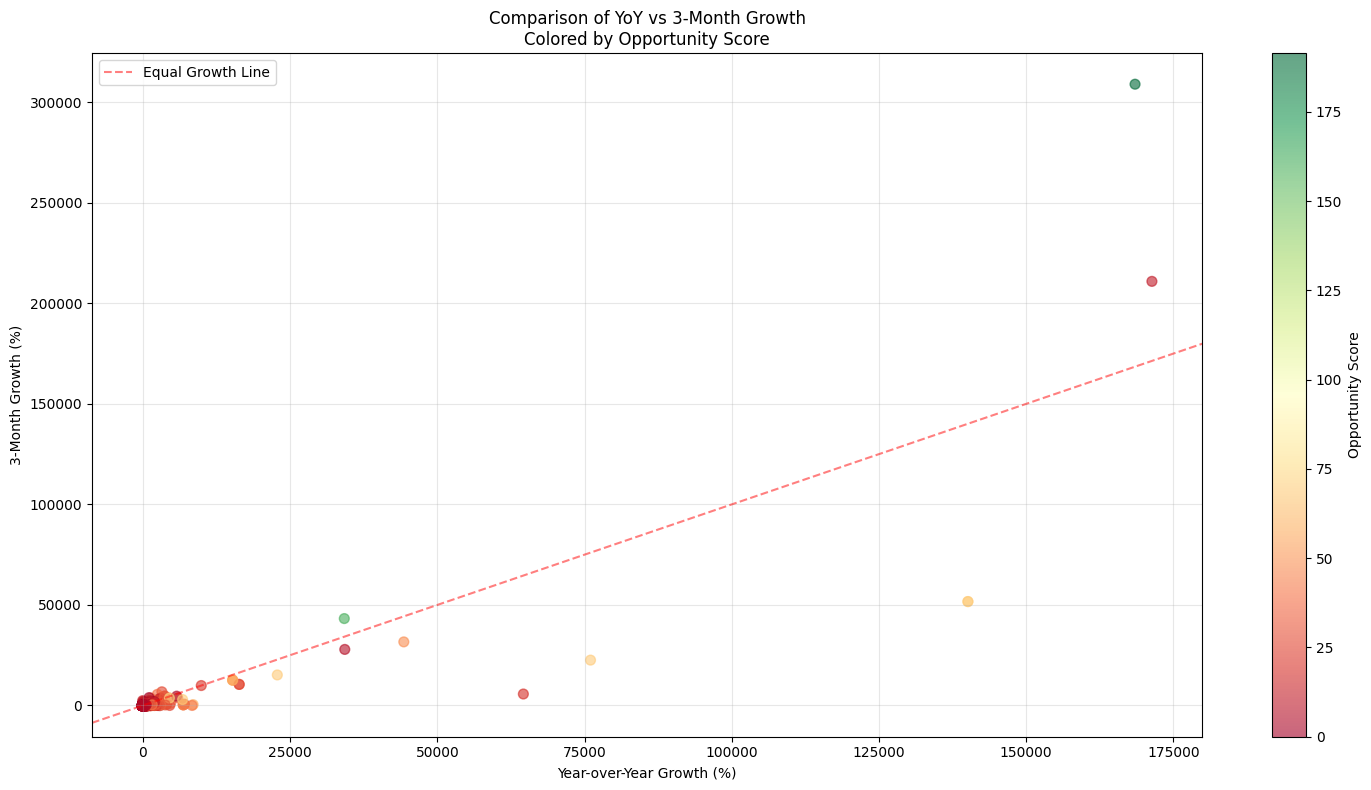

In [60]:
# Get all monthly volume columns
monthly_cols = df.filter(regex=r'\d{4}_\d{2}').columns

# ============================================================================
# Growth Metrics
# ============================================================================

# Calculate 3-Month Growth: growth_3m = ((current_volume - volume_3_months_ago) / volume_3_months_ago) × 100
if len(monthly_cols) >= 3:
    current_volume = df[monthly_cols].iloc[:, -1]  # Most recent month
    volume_3_months_ago = df[monthly_cols].iloc[:, -3]  # 3 months ago
    # Handle division by zero
    df['growth_3m'] = np.where(volume_3_months_ago > 0,
                                ((current_volume - volume_3_months_ago) / volume_3_months_ago) * 100,
                                np.nan)
else:
    df['growth_3m'] = np.nan

# Calculate Year-over-Year (YoY) Growth: growth_YoY = ((current_volume - volume_1_year_ago) / volume_1_year_ago) × 100
if len(monthly_cols) >= 12:
    current_volume = df[monthly_cols].iloc[:, -1]  # Most recent month
    volume_1_year_ago = df[monthly_cols].iloc[:, -12]  # 12 months ago (1 year)
    # Handle division by zero
    df['growth_YoY'] = np.where(volume_1_year_ago > 0,
                                 ((current_volume - volume_1_year_ago) / volume_1_year_ago) * 100,
                                 np.nan)
else:
    df['growth_YoY'] = np.nan

# ============================================================================
# Opportunity Score Metrics
# ============================================================================

# Calculate Volatility for each keyword
df['volatility'] = df[monthly_cols].apply(calculate_volatility, axis=1)

# Calculate Trend Strength: trend_strength = transformed_growth / (1 + volatility)
# where transformed_growth = max(0, 1 + (YoY_growth% / 100))
df['trend_strength'] = df.apply(lambda row: calculate_trend_strength(row['growth_YoY'], row['volatility']), axis=1)

# Calculate Bid Efficiency: bid_efficiency = top_page_bid / CPC
# Using average of low and high top page bid
df['avg_top_page_bid'] = (df['low_top_of_page_bid'] * df['high_top_of_page_bid']) ** 0.5
df['bid_efficiency'] = np.where((df['cpc'] > 0) & (df['avg_top_page_bid'] > 0),
                                 df['avg_top_page_bid'] / df['cpc'],
                                 np.nan)

# Calculate TAC (Total Advertiser Cost): TAC = volume × CPC
df['TAC'] = df['search_volume'] * df['cpc']

# Calculate SAC (Search Advertiser Cost): SAC = TAC × (1 - Competition/100)
# Convert competition to numeric if needed (handle NaN)
competition_numeric = pd.to_numeric(df['competition'], errors='coerce')
df['SAC'] = df['TAC'] * (101 - competition_numeric) / 100

# Calculate Opportunity Score: opportunity_score = (log₁₀(SAC))² × √(trend_strength) × √(bid_efficiency)
# Only calculated if SAC > 0 and trend_strength >= 0 and bid_efficiency >= 0
df['opportunity_score'] = np.where(
    (df['SAC'] > 0) & (~df['trend_strength'].isna()) & (~df['bid_efficiency'].isna()) & 
    (df['trend_strength'] >= 0) & (df['bid_efficiency'] >= 0),
    (np.log10(df['SAC']))**2 * np.sqrt(df['trend_strength']) * np.sqrt(df['bid_efficiency']),
    np.nan
)

# Display summary statistics of the new metrics
print("\nGrowth Metrics Statistics:")
print(df[['growth_3m', 'growth_YoY']].describe())

print("\nOpportunity Score Metrics Statistics:")
print(df[['volatility', 'trend_strength', 'bid_efficiency', 'TAC', 'SAC', 'opportunity_score']].describe())

# Create scatter plot comparing YoY vs 3-Month growth, colored by opportunity score
plt.figure(figsize=(15, 8))

# Filter out NaN values for plotting
plot_data = df.dropna(subset=['growth_YoY', 'growth_3m', 'opportunity_score'])

if len(plot_data) > 0:
    scatter = plt.scatter(plot_data['growth_YoY'], plot_data['growth_3m'], 
                         c=plot_data['opportunity_score'], cmap='RdYlGn',
                         alpha=0.6, s=50)
    plt.colorbar(scatter, label='Opportunity Score')
else:
    # Fallback if no valid data
    scatter = plt.scatter(df['growth_YoY'], df['growth_3m'], 
                         alpha=0.6, s=50)
    print("Warning: No valid opportunity_score data for coloring")

plt.xlabel('Year-over-Year Growth (%)')
plt.ylabel('3-Month Growth (%)')
plt.title('Comparison of YoY vs 3-Month Growth\nColored by Opportunity Score')

# Add diagonal reference line
plt.axline([0, 0], [1, 1], color='red', linestyle='--', alpha=0.5,
           label='Equal Growth Line')

plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()


In [61]:
months_columns = [col for col in df.columns if col.startswith('20')]
df.sort_values(by='trend_strength', ascending=False).head(20)

,keyword,search_volume,competition,low_top_of_page_bid,high_top_of_page_bid,cpc,2025_09,2025_08,2025_07,2025_06,...,2021_11,growth_3m,growth_YoY,volatility,trend_strength,avg_top_page_bid,bid_efficiency,TAC,SAC,opportunity_score
134431,beauty gift ideas,480.0,100.0,0.21,1.13,1.14,320.0,210.0,320.0,390.0,...,823000.0,210925.641026,171358.333333,0.812912,945.761915,0.487134,0.427311,547.2,5.472,10.953365
30153,toy deals,12100.0,94.0,0.19,1.93,1.31,9900.0,8100.0,6600.0,6600.0,...,20400000.0,308990.909091,168495.041322,0.829053,921.761465,0.605558,0.462258,15851.0,1109.570,191.412403
192698,list products online,260.0,22.0,0.07,0.65,0.94,260.0,320.0,210.0,260.0,...,673000.0,51669.230769,140108.333333,0.826469,767.646771,0.213307,0.226923,244.4,193.076,68.955489
48230,online product listing,260.0,22.0,0.07,0.65,0.94,260.0,320.0,210.0,260.0,...,673000.0,51669.230769,140108.333333,0.826469,767.646771,0.213307,0.226923,244.4,193.076,68.955489
12600,electronics deals,49500.0,100.0,0.11,1.23,3.23,12100.0,14800.0,18100.0,12100.0,...,2740000.0,22544.628099,76011.111111,0.940263,392.272066,0.367831,0.113880,159885.0,1598.850,68.604052
119811,private vacation homes,170.0,23.0,0.02,0.10,0.45,390.0,140.0,260.0,210.0,...,110000.0,5689.473684,64605.882353,0.871061,345.824490,0.044721,0.099381,76.5,59.670,18.486118
175449,beauty clearance,480.0,100.0,0.34,2.92,0.96,480.0,480.0,590.0,390.0,...,165000.0,27866.101695,34275.000000,0.779786,193.141186,0.996393,1.037910,460.8,4.608,6.233263
117182,home deals,4400.0,24.0,0.20,3.50,0.94,4400.0,4400.0,5400.0,4400.0,...,823000.0,43215.789474,34191.666667,0.782012,192.432321,0.836660,0.890064,4136.0,3184.720,160.600737
175050,video marketing analytics,3600.0,0.0,0.02,0.08,0.11,480.0,4400.0,390.0,33100.0,...,22200.0,31614.285714,44300.000000,2.186728,139.327872,0.040000,0.363636,396.0,399.960,48.191758
56188,rent with roommates,1300.0,27.0,0.20,1.36,1.26,1600.0,1300.0,1600.0,1300.0,...,550000.0,15177.777778,22816.666667,0.815682,126.215206,0.521536,0.413918,1638.0,1212.120,68.724810


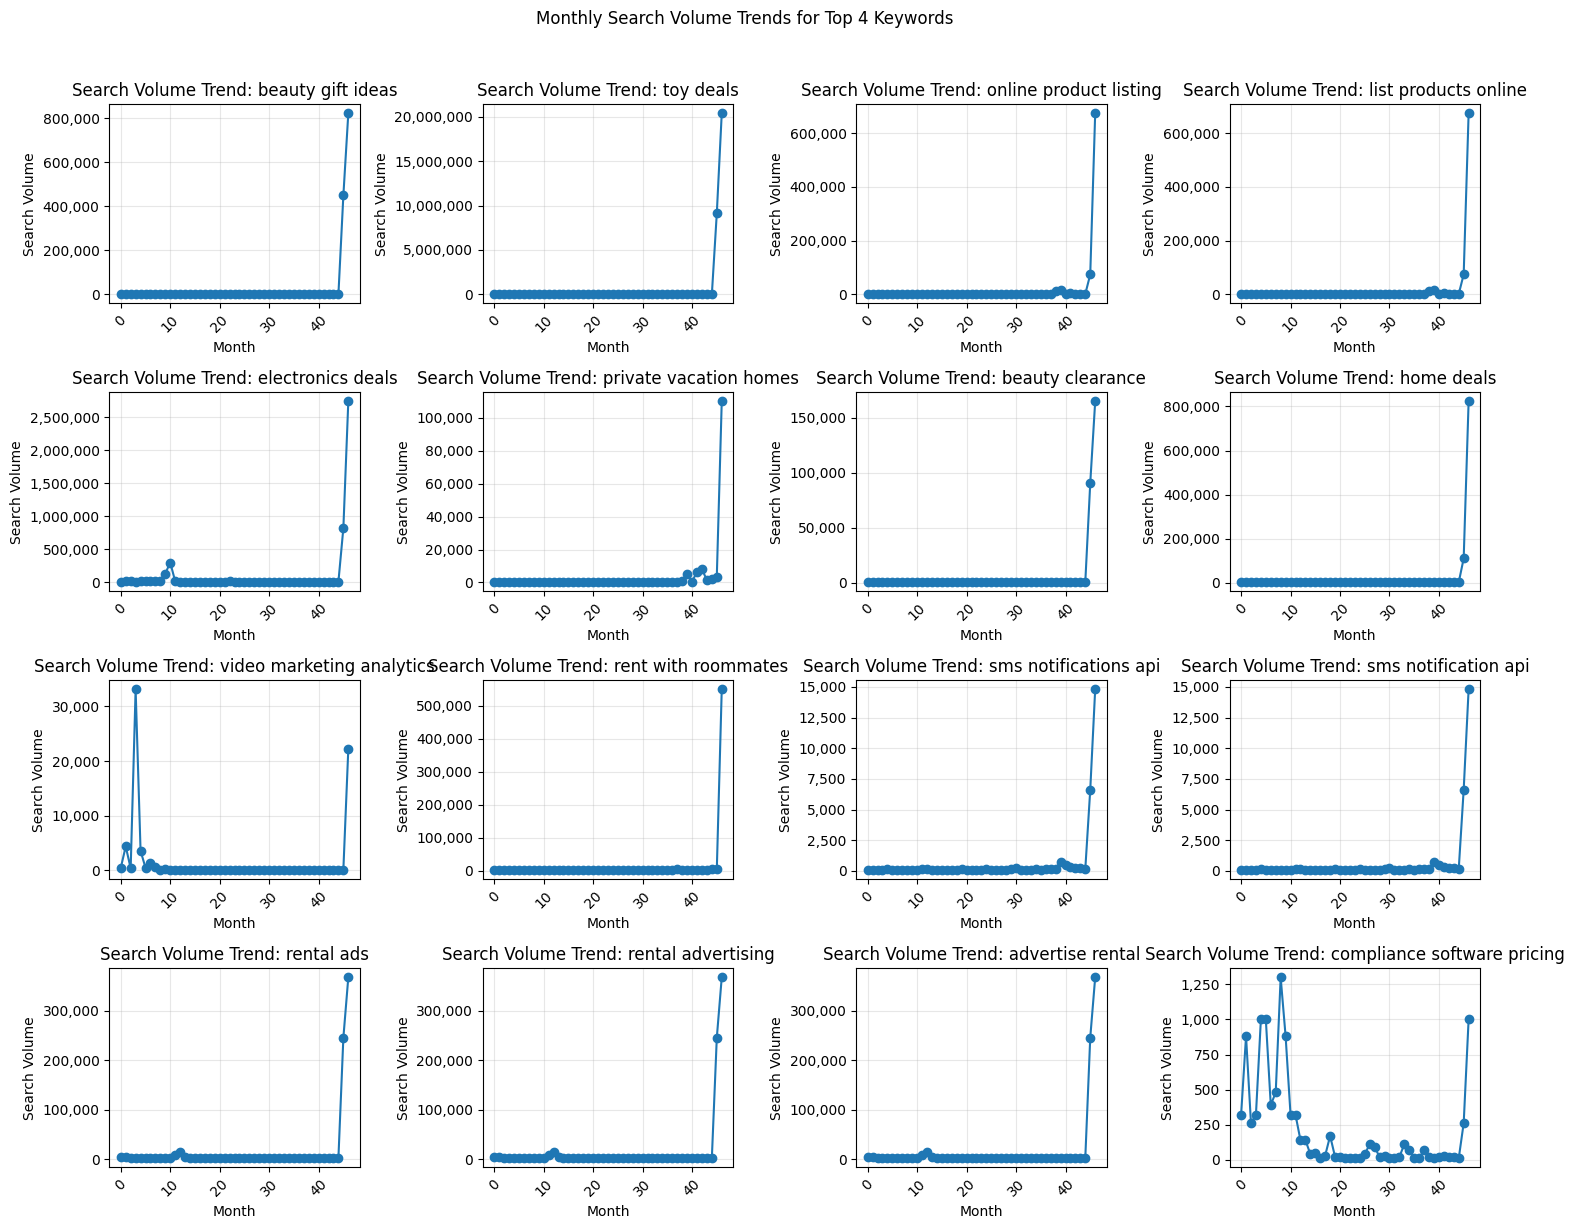

In [62]:
# Plot top 4 keywords by opportunity score
top_4_keywords = df.nlargest(16, 'trend_strength')
# top_4_keywords = df.nlargest(4, 'growth_YoY')
# top_4_keywords = df.nlargest(4, 'growth_3m')
monthly_data = df[months_columns]

# Create subplots
fig, axes = plt.subplots(4, 4, figsize=(15, 12))
axes = axes.ravel()

# Plot each keyword in its own subplot
for idx, (_, row) in enumerate(top_4_keywords.iterrows()):
    keyword = row['keyword']
    keyword_data = monthly_data.loc[row.name]
    
    axes[idx].plot(range(len(months_columns)), keyword_data, marker='o')
    axes[idx].set_title(f'Search Volume Trend: {keyword}')
    axes[idx].set_xlabel('Month')
    axes[idx].set_ylabel('Search Volume')
    axes[idx].tick_params(axis='x', rotation=45)
    axes[idx].grid(True, alpha=0.3)
    
    # Format y-axis with comma separator for thousands
    axes[idx].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.suptitle('Monthly Search Volume Trends for Top 4 Keywords', y=1.02)
plt.tight_layout()
plt.show()


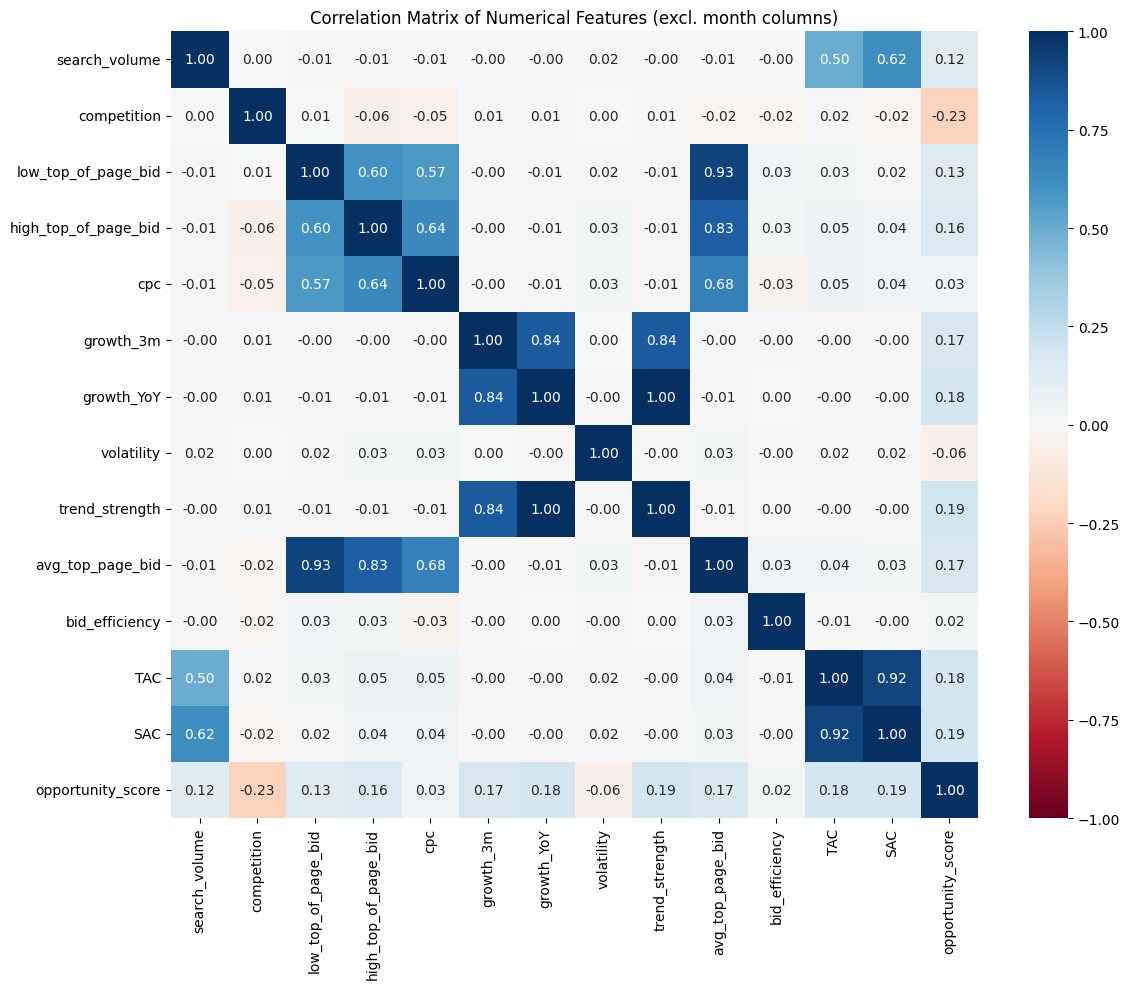

In [63]:
import seaborn as sns

# Identify month columns
month_cols = [col for col in df.columns if col.startswith('20')]

# Identify numerical columns excluding month columns and 'keyword'
numerical_cols = [col for col in df.select_dtypes(include='number').columns if col not in month_cols]

# Calculate correlation matrix for numerical features excluding month columns
correlation_matrix = df[numerical_cols].corr()

# Create a figure with appropriate size
plt.figure(figsize=(12, 10))

# Create heatmap
sns.heatmap(correlation_matrix,
            annot=True,  # Show correlation values 
            cmap='RdBu',  # Red-Blue colormap
            vmin=-1, vmax=1,  # Fix scale from -1 to 1
            center=0,  # Center colormap at 0
            fmt='.2f')  # Format correlation values to 2 decimal places

plt.title('Correlation Matrix of Numerical Features (excl. month columns)')
plt.tight_layout()
plt.show()

In [64]:
df.to_csv('keywords_data.csv', index=False)